In [ ]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

fatal: destination path 'yolov7' already exists and is not an empty directory.
/content/yolov7


In [ ]:
import os

# Define the base directory (modify if yolov7 is in a different path)
base_dir = "/content/yolov7"

# Create the folder structure
os.makedirs(os.path.join(base_dir, "runs/train/exp/weights"), exist_ok=True)

print("Folder structure created successfully!")


Folder structure created successfully!


Upload best.pt file with the pre-trained weights

In [ ]:
%cd /content

/content


In [ ]:
!python '/content/yolov7/detect.py' --weights /content/yolov7/runs/train/exp/weights/best.pt  --source '/content/yolov7/allfiles/*.jpg' --save-txt

Namespace(weights=['/content/yolov7/runs/train/exp/weights/best.pt'], source='/content/yolov7/allfiles/*.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.5.0+cu121 CPU

/content/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to 

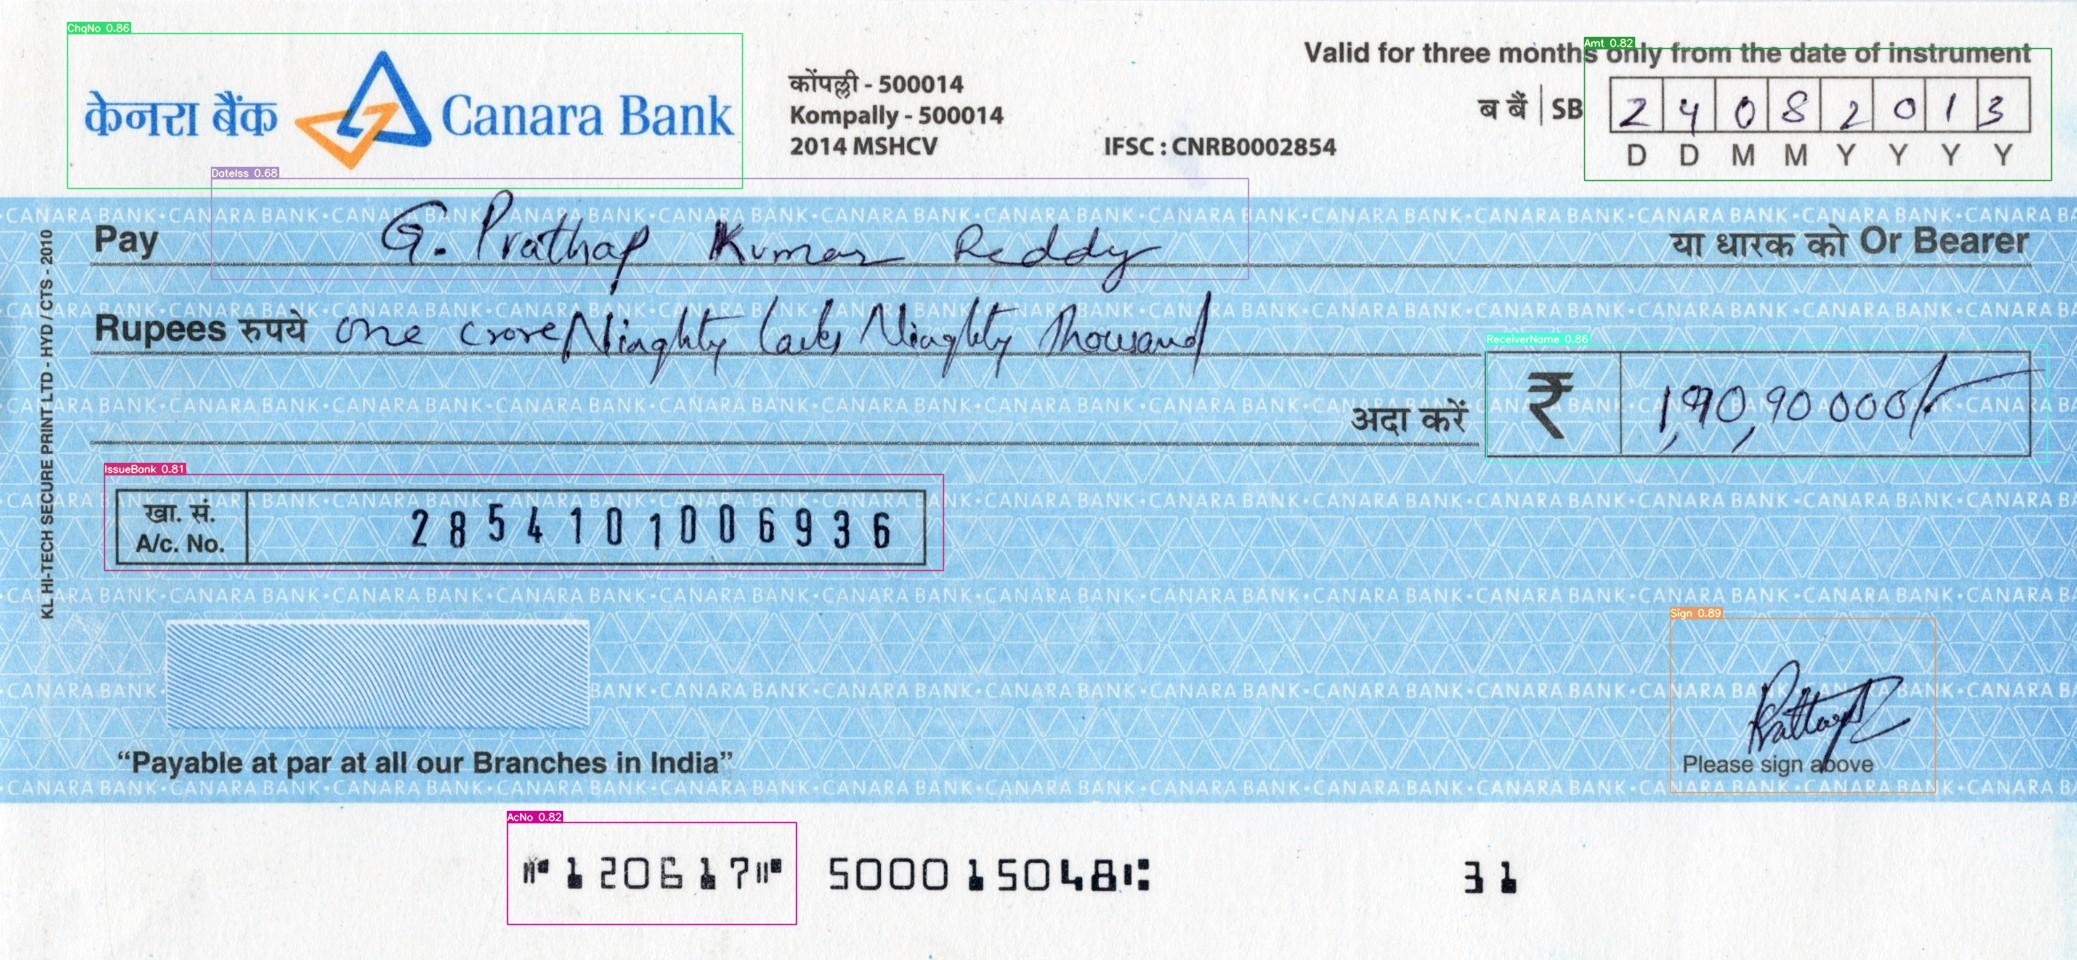

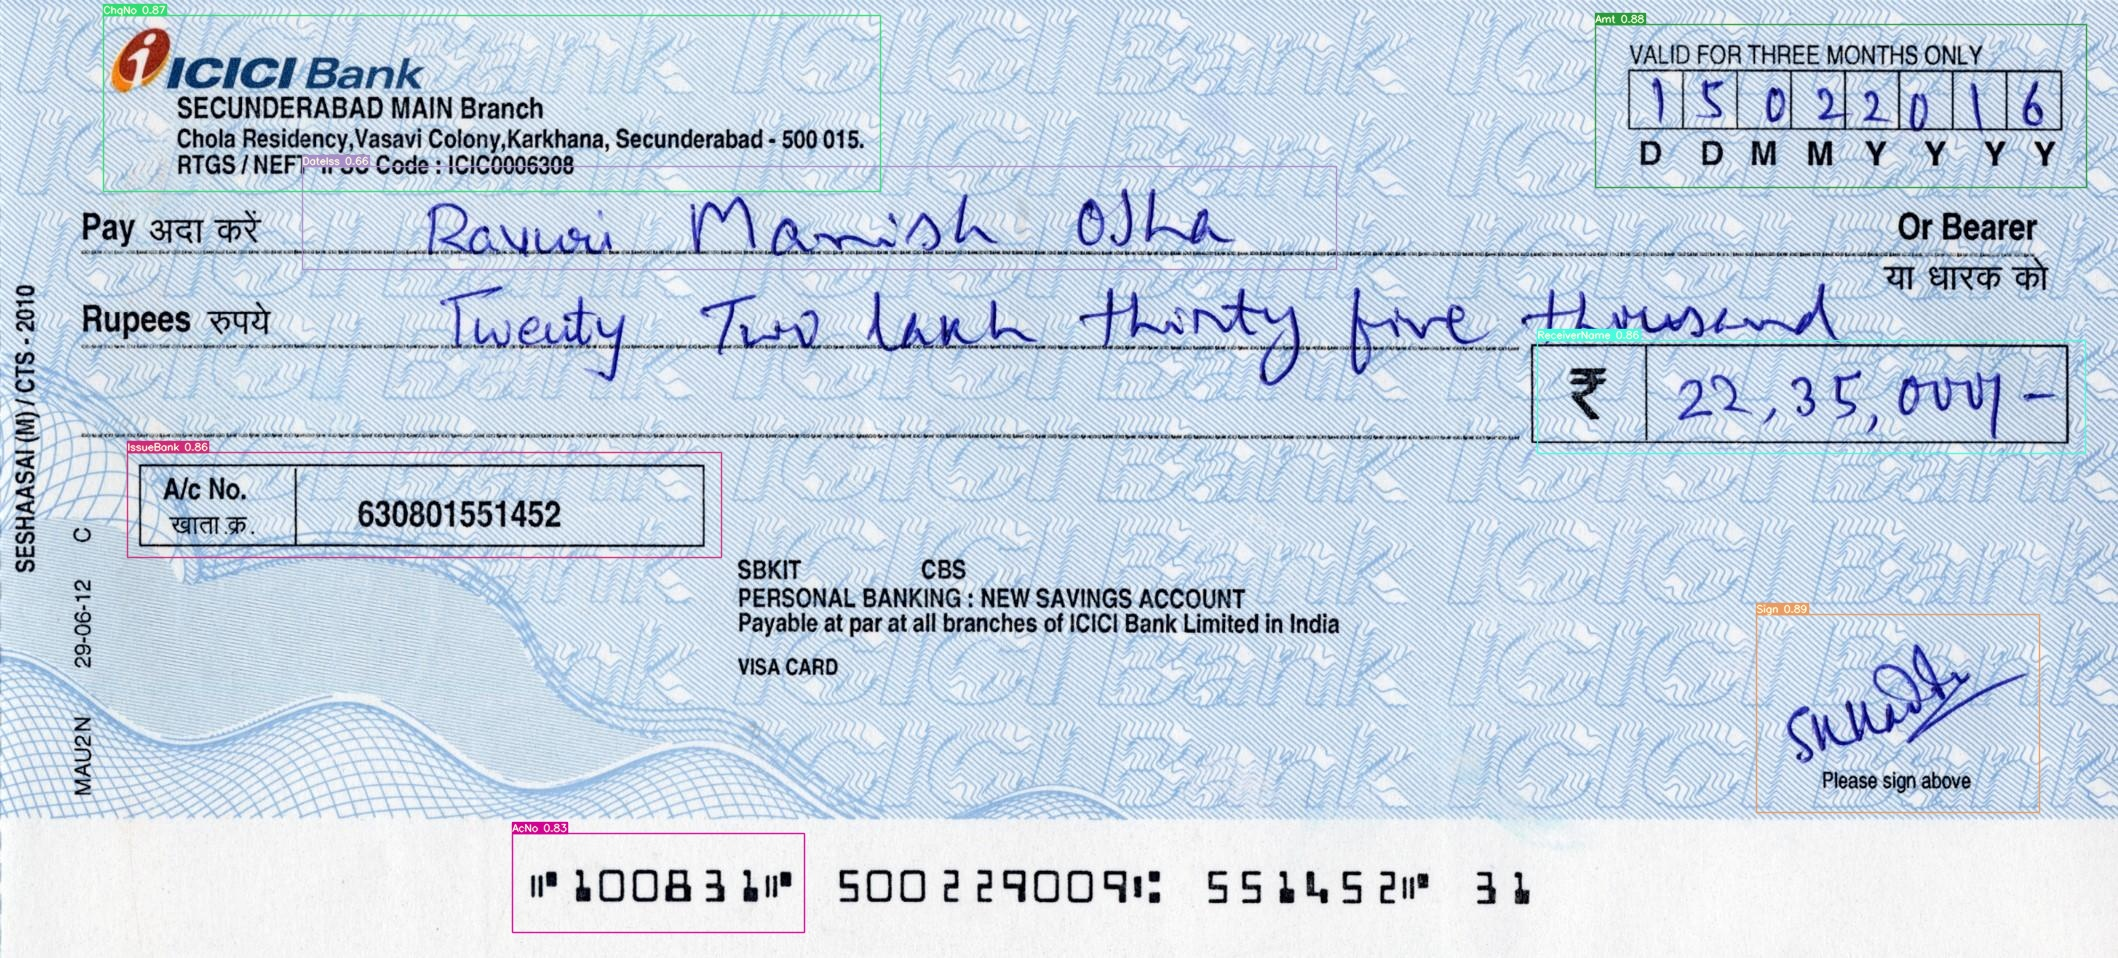

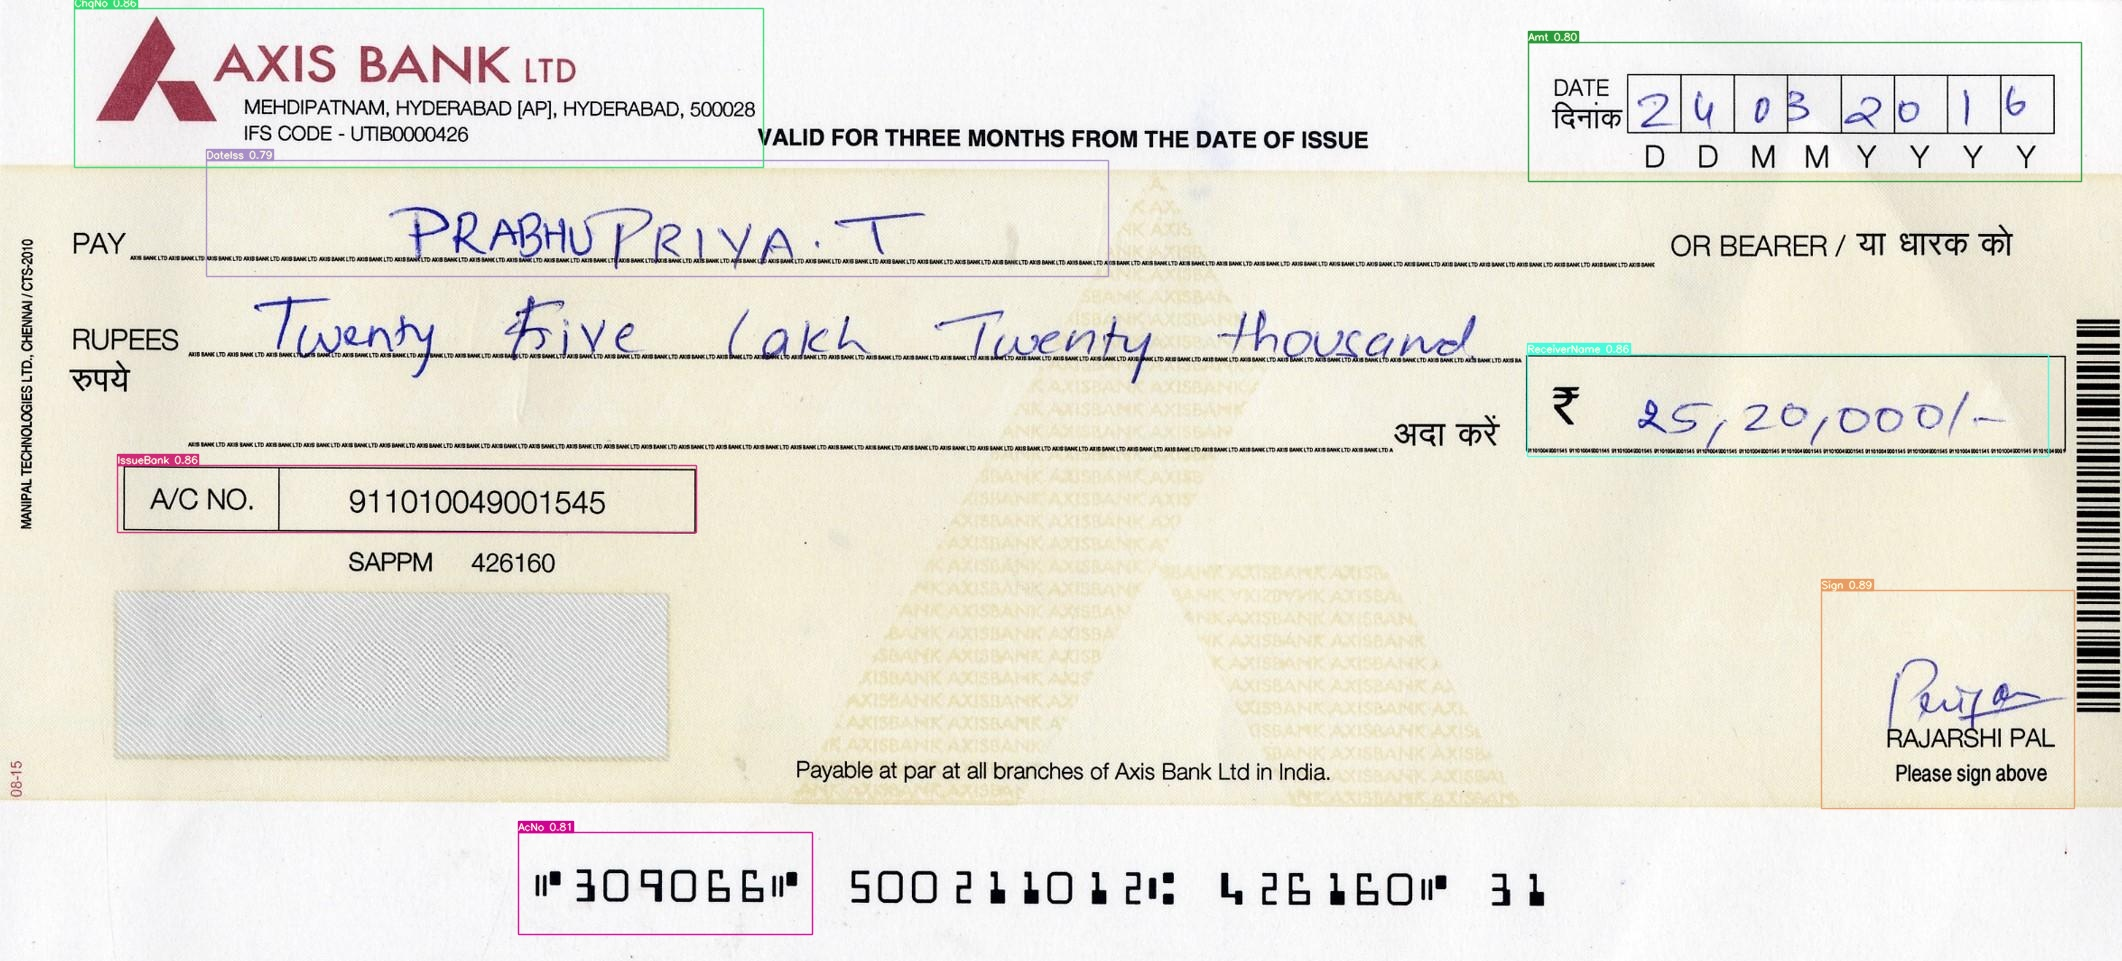

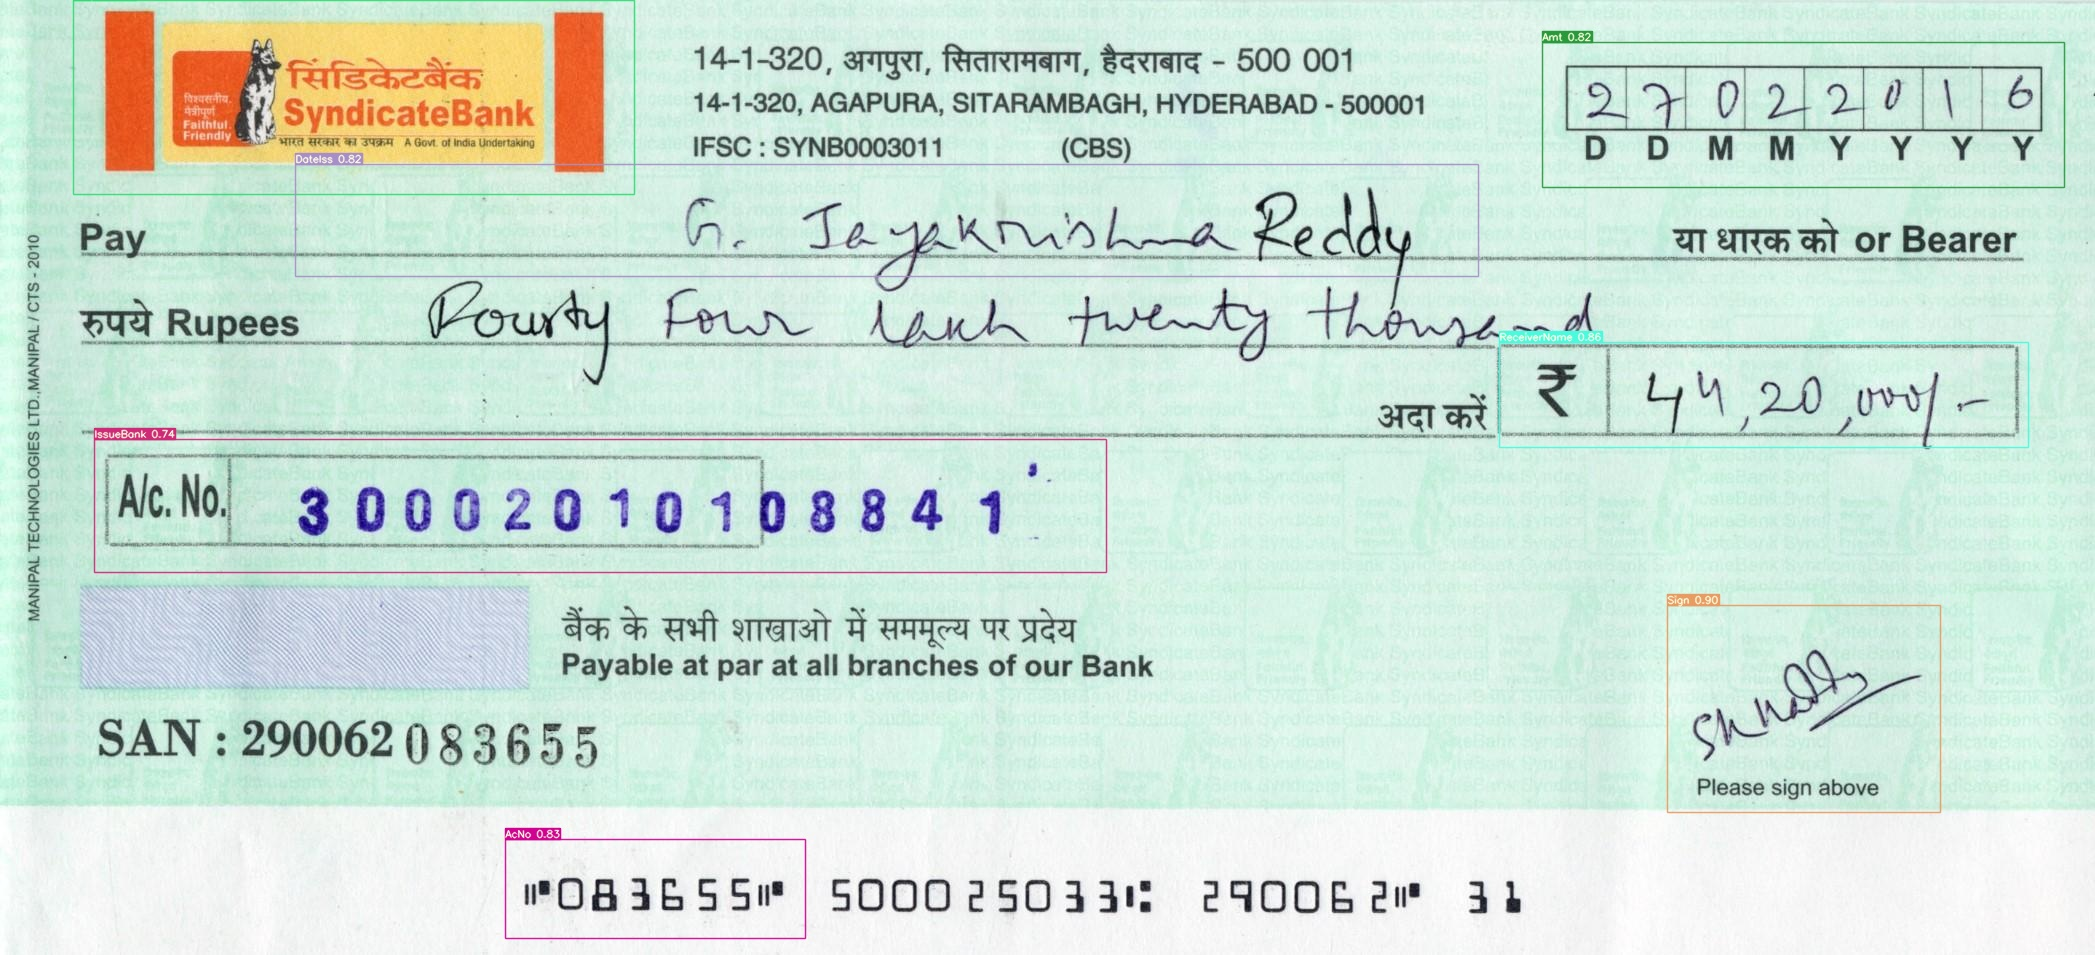

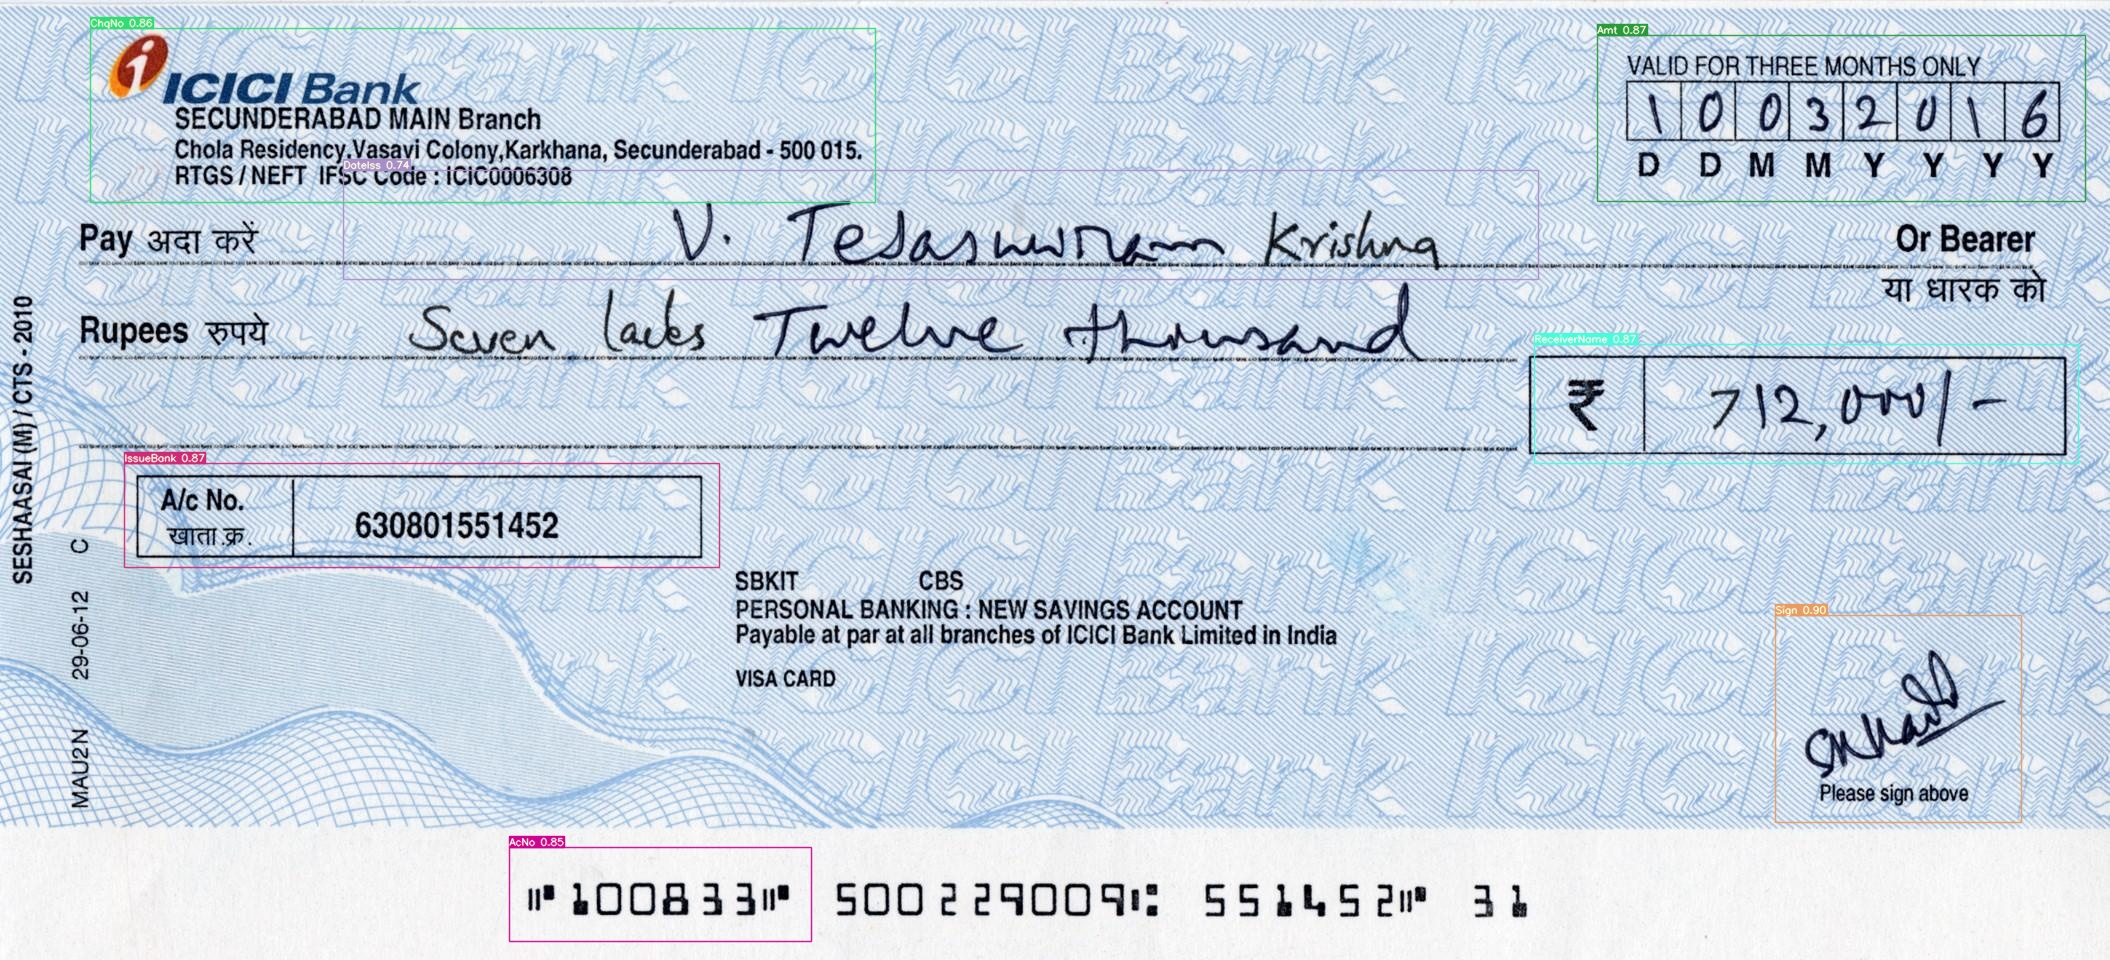

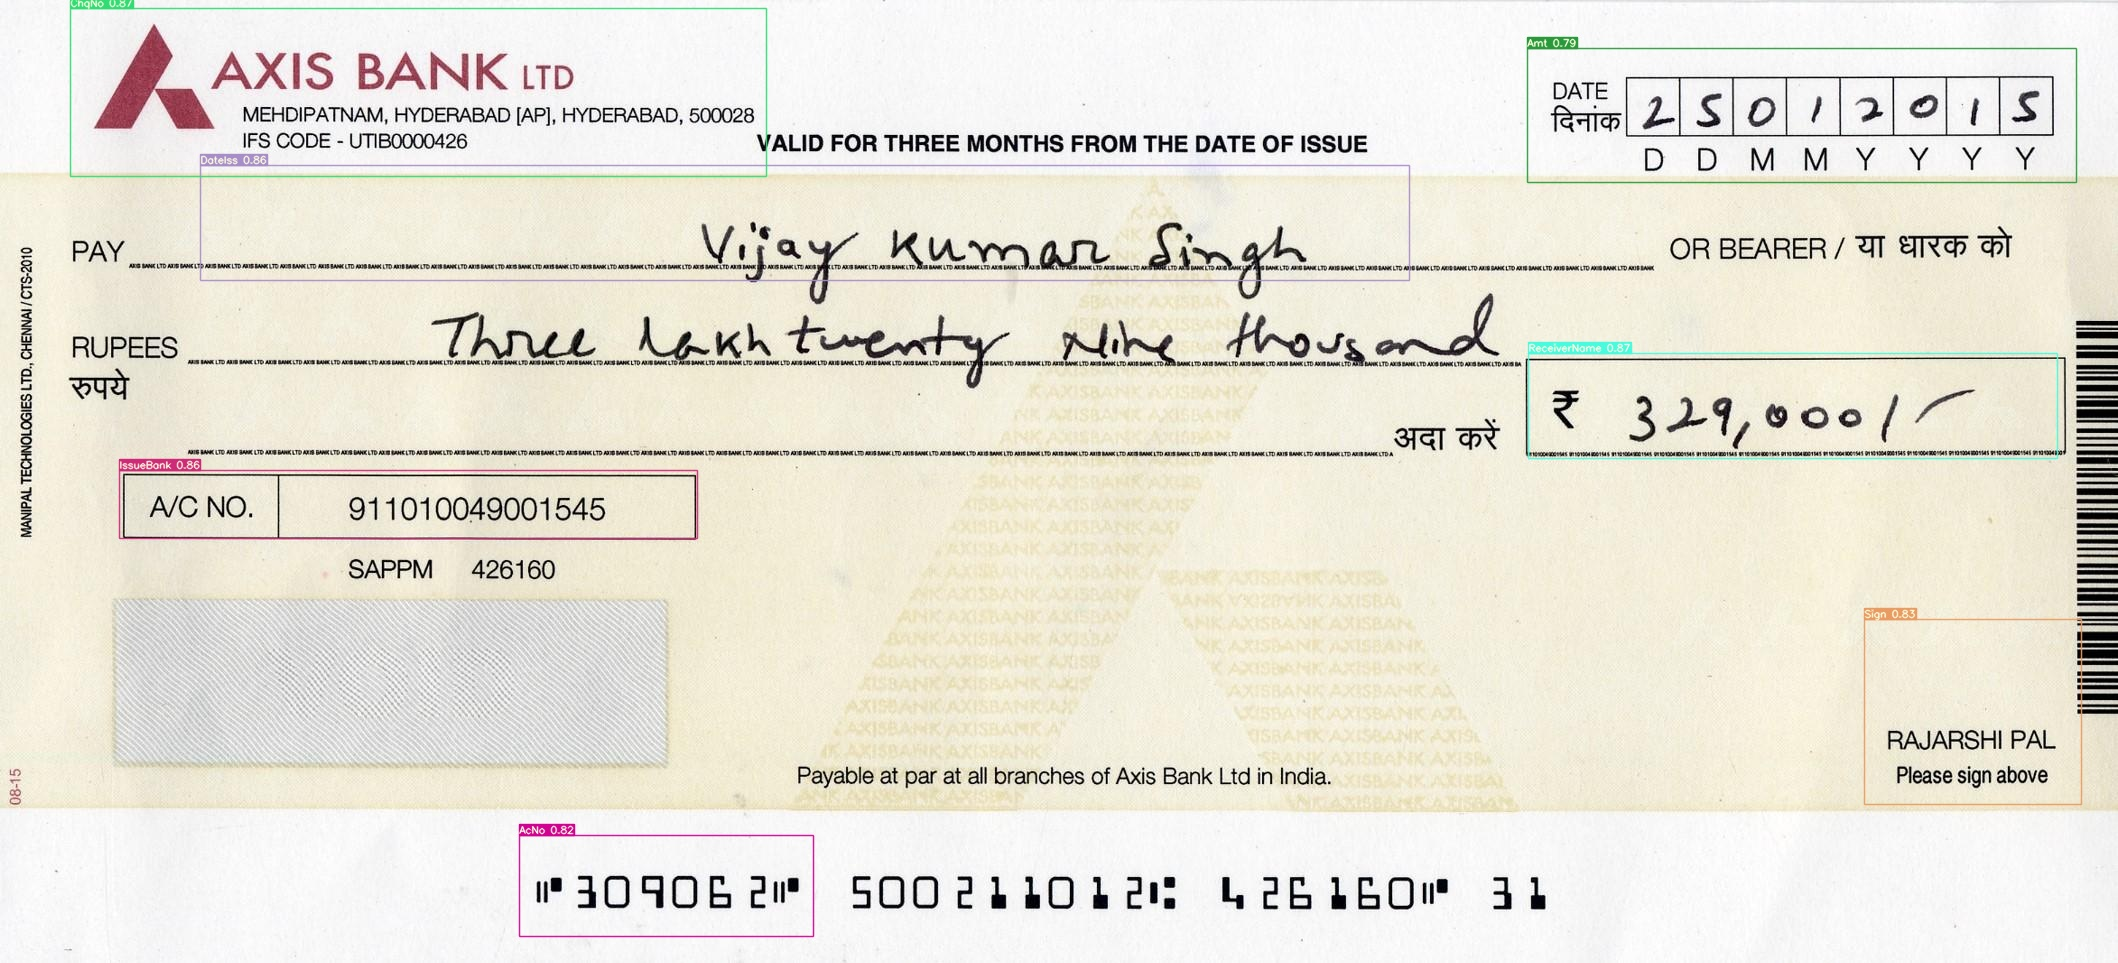

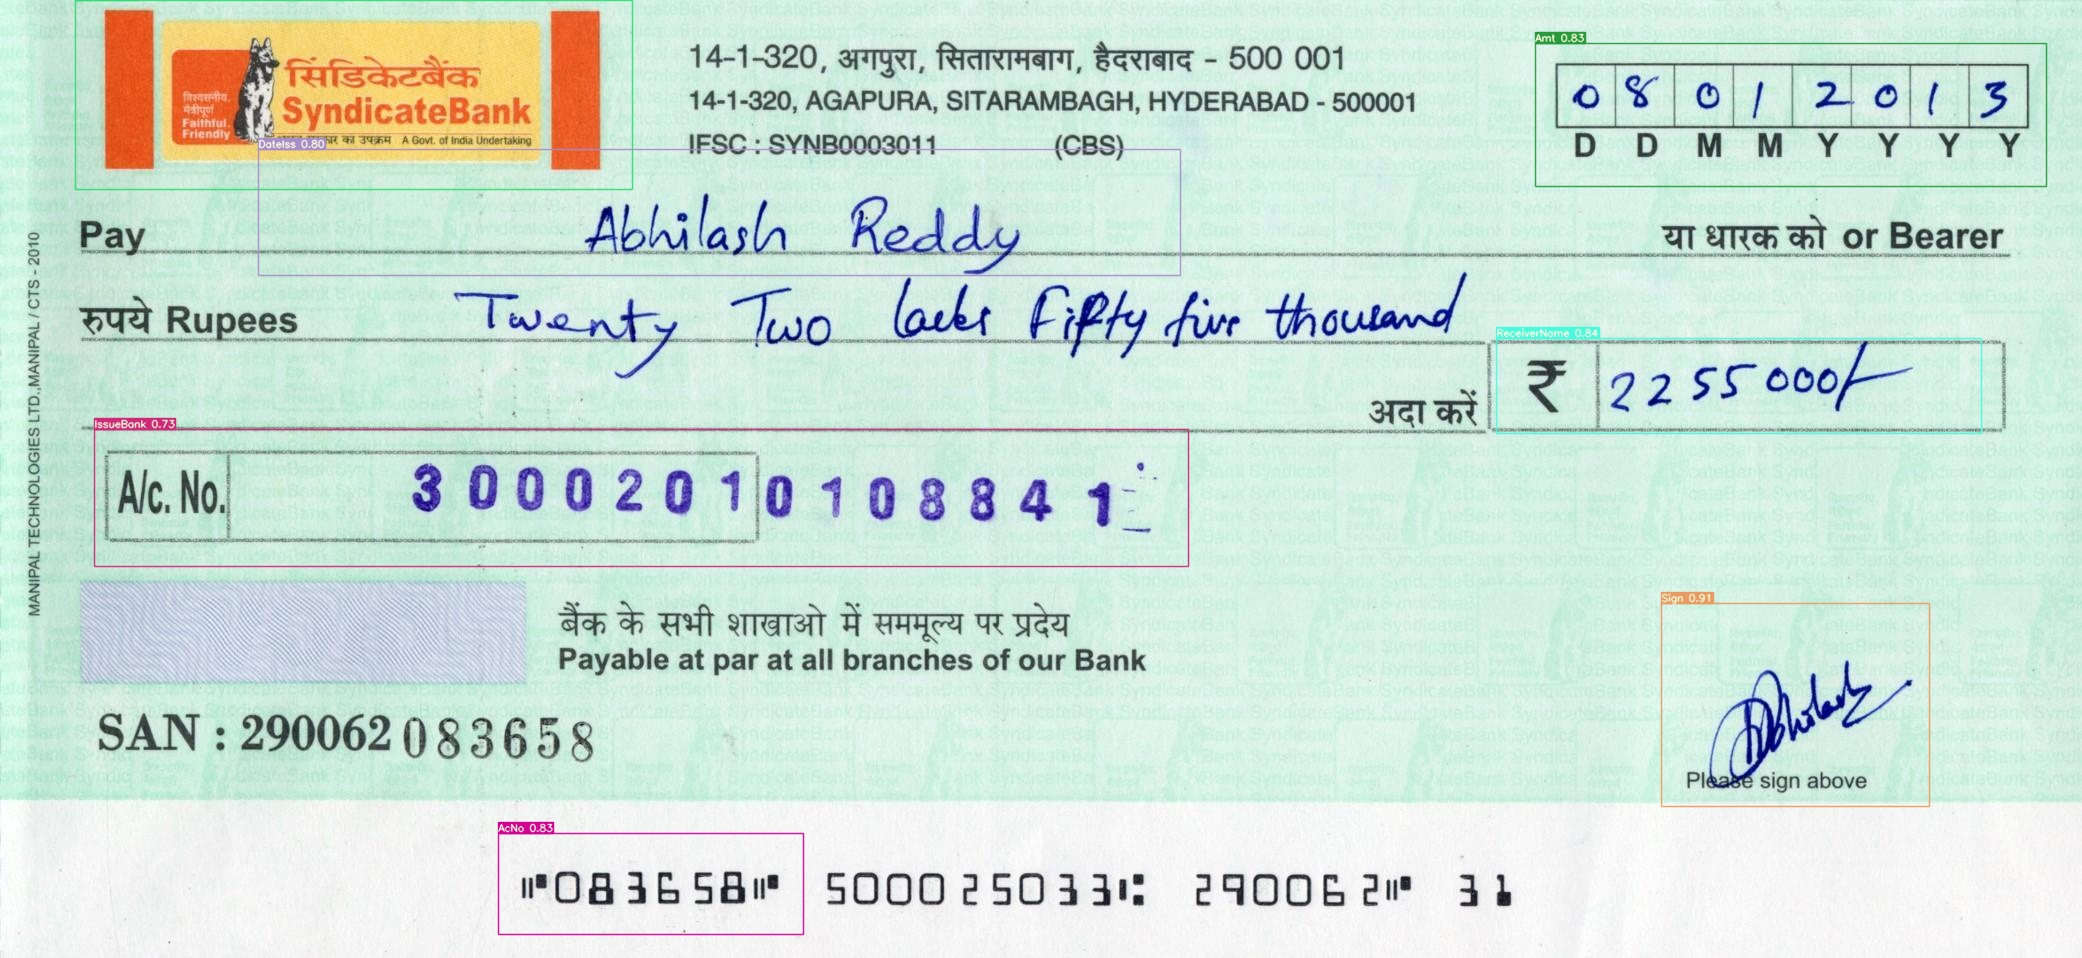

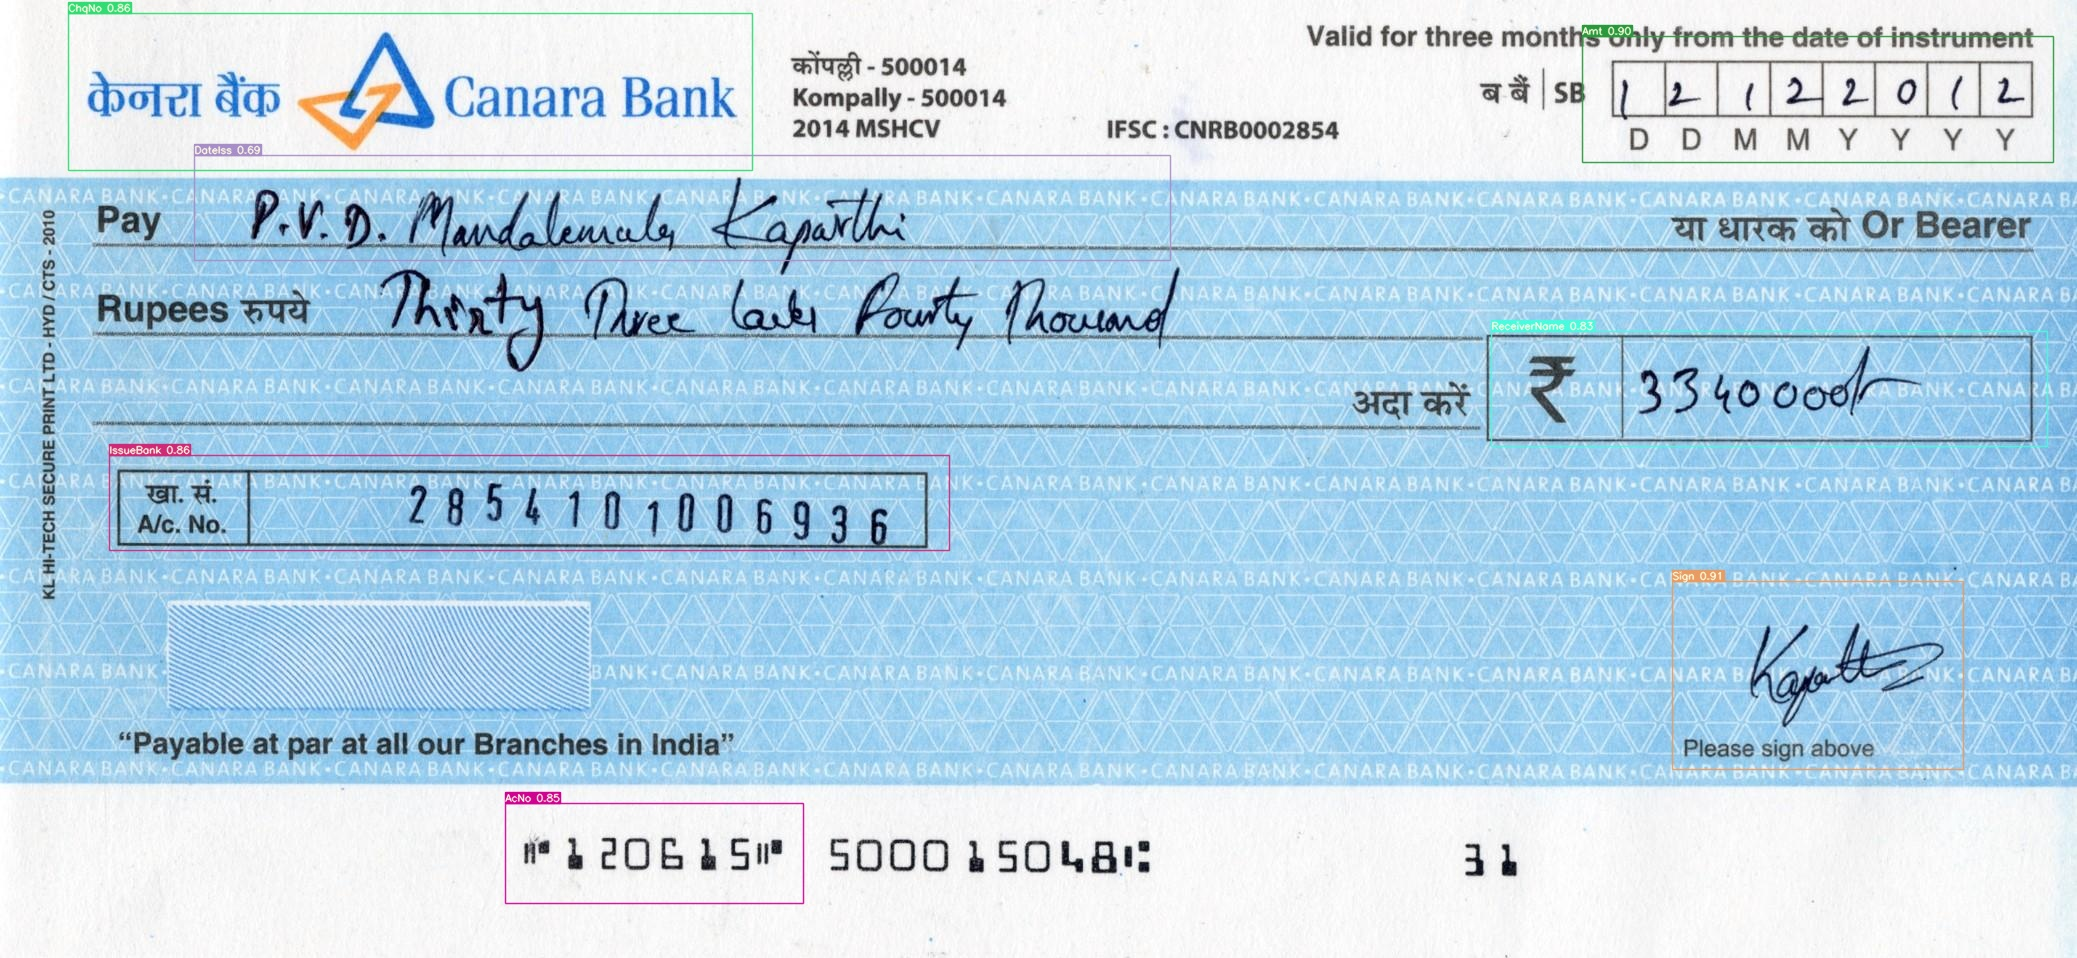

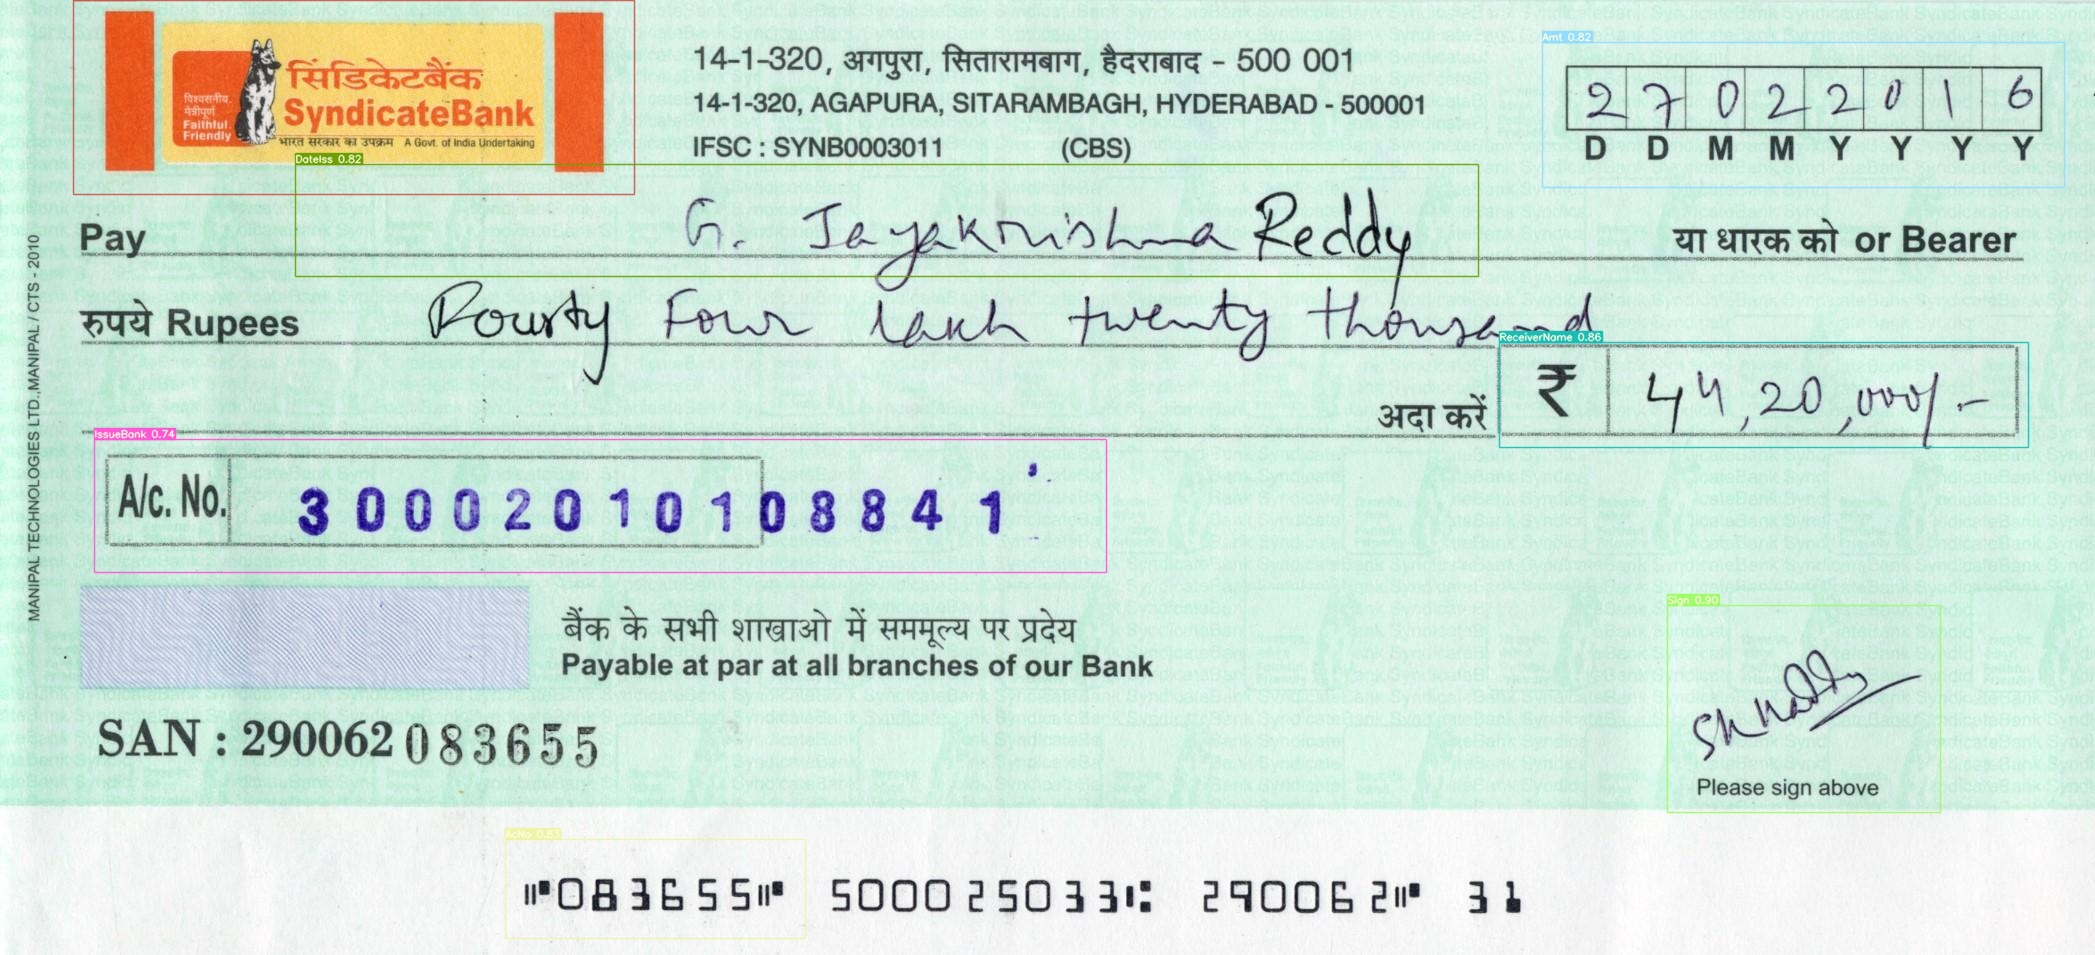

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/runs/detect/*/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1

This is to sort the labels generated according to the class labels as generated by Roboflow.


classes: ['AcNo', 'Amt', 'ChqNo', 'DateIss', 'IssueBank', 'ReceiverName', 'Sign' ]


It is alphabetical and this code helps to ensure that the bounding boxes detected are for the same object across all cheque images.

In [ ]:
import glob

# Path to the directory containing YOLO txt files
label_dir = '/content/runs/detect/exp10/labels'

# Iterate through each label file in the directory
for label_file in glob.glob(f"{label_dir}/*.txt"):
    # Read the contents of the file
    with open(label_file, 'r') as file:
        lines = file.readlines()

    # Split each line and sort by the class (first column)
    lines = sorted(lines, key=lambda x: int(x.split()[0]))

    # Write the sorted lines back to the file
    with open(label_file, 'w') as file:
        file.writelines(lines)

print("Files sorted and saved successfully!")


Files sorted and saved successfully!


In [ ]:
import cv2
import glob
import os

# Directories
image_dir = '/content/yolov7/allfiles'           # Path to original images
label_dir = '/content/runs/detect/exp10/labels'    # Path to YOLO output labels
output_dir = '/content/runs/detect/exp10/bboxes_allfiles'       # Directory to save extracted bounding boxes

classes = ['AccountNumber', 'Amount', 'ChequeNumber', 'DateIssue', 'BankName', 'PayeeName', 'Signature']

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate through each label file
for label_file in glob.glob(os.path.join(label_dir, '*.txt')):
    # Get corresponding image file
    image_file = os.path.join(image_dir, os.path.basename(label_file).replace('.txt', '.jpg'))

    # Load image
    image = cv2.imread(image_file)
    if image is None:
        print(f"Could not read image {image_file}")
        continue
    h, w, _ = image.shape

    # Open and read label file
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for idx, line in enumerate(lines):
            # Parse bounding box data
            class_id, x_center, y_center, width, height = map(float, line.split())

            # Convert from YOLO normalized coordinates to pixel coordinates
            x_center = int(x_center * w)
            y_center = int(y_center * h)
            box_width = int(width * w)
            box_height = int(height * h)

            # Calculate top-left and bottom-right coordinates
            x1 = int(x_center - box_width / 2)
            y1 = int(y_center - box_height / 2)
            x2 = int(x_center + box_width / 2)
            y2 = int(y_center + box_height / 2)

            # Crop the bounding box from the image
            bbox = image[y1:y2, x1:x2]

            # Initialize class_name based on idx
            class_name = None

            # If loop to match idx to the respective class name
            if idx == 0:
                class_name = classes[0]
            elif idx == 1:
                class_name = classes[1]
            elif idx == 2:
                class_name = classes[2]
            elif idx == 3:
                class_name = classes[3]
            elif idx == 4:
                class_name = classes[4]
            elif idx == 5:
                class_name = classes[5]
            elif idx == 6:
                class_name = classes[6]
            else:
                class_name = "Unknown"

            # Save the cropped bounding box
            bbox_filename = os.path.join(output_dir, f"{os.path.basename(image_file).split('.')[0]}_bbox{class_name}.jpg")
            try:
                cv2.imwrite(bbox_filename, bbox)
            except cv2.error as e:
                print(f"Error saving bounding box for {bbox_filename}: {e}")
                print(f"Skipping this bounding box...")

print("Bounding boxes extracted and saved successfully!")

Error saving bounding box for /content/runs/detect/exp10/bboxes_allfiles/Cheque094_bboxBankName.jpg: OpenCV(4.10.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Skipping this bounding box...
Unknown
Bounding boxes extracted and saved successfully!


In [ ]:
import shutil


folder_path = '/content/runs/detect/exp10/bboxes_allfiles'
zip_path = '/content/extracted_images.zip'

# Zip the folder
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)


'/content/extracted_images.zip'

In [ ]:
from google.colab import files

# Download the zipped file
files.download(zip_path)

Note to my forgetful future self : This version of detect.py has been modified a bit. Now this entire file can have a pipeline but we need to host this somewhere with a storage to have it work in real-time.